In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns   # for heatmap


In [7]:
# Load the data
data = pd.read_csv("../files/input/AMVA_Accidentalidad_20191022_2.csv", encoding="latin1", sep=";").copy()
data.head()

,COD_MUNICIPIO,MUNICIPIO,FECHA,HORA,DÍA DE LA SEMANA,CLASE,DIRECCIÓN,GRAVEDAÑOSSADAÑOSS,BARRIO,COMUNA,DISEÑO
0,79.0,BARBOSA,03/01/2015,01:00:00 PM,SABADO,CHOQUE,VIA BELLO HATILLO KM16+200,HERIDOS,EL HATILLO,SIN INFORMACIÓN,TRAMO DE VIA
1,79.0,BARBOSA,07/01/2015,03:00:00 PM,MIERCOLES,CHOQUE,HATILLO-BELLO KM 18+00,HERIDOS,PARQUE PRINCIPAL,SIN INFORMACIÓN,TRAMO DE VIA
2,79.0,BARBOSA,04/01/2015,04:01:00 AM,DOMINGO,CHOQUE,KM 16+395 METROS BARBOSA-HATILLO,HERIDOS,VIA EL HATILLO-CISNEROS,SIN INFORMACIÓN,TRAMO DE VIA
3,79.0,BARBOSA,05/01/2015,12:00:00 PM,LUNES,CHOQUE,BELLO- DON MATIAS KM 9+600,HERIDOS,EL HATILLO,SIN INFORMACIÓN,TRAMO DE VIA
4,79.0,BARBOSA,11/01/2015,01:30:00 PM,DOMINGO,CHOQUE,LOS ABUELOS,DAÑOS,PARQUE PRINCIPAL,SIN INFORMACIÓN,TRAMO DE VIA


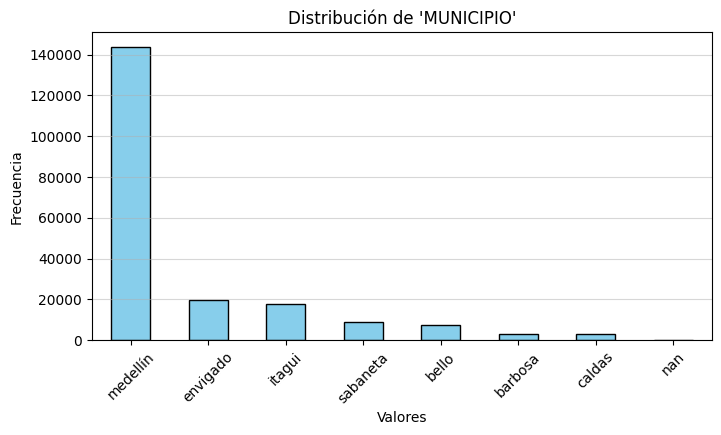

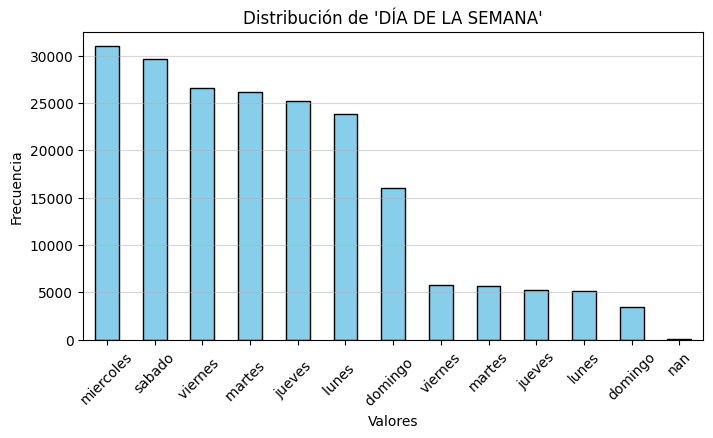

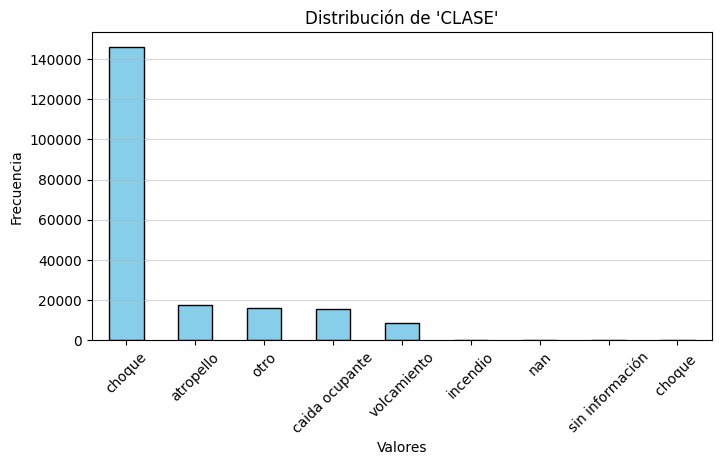

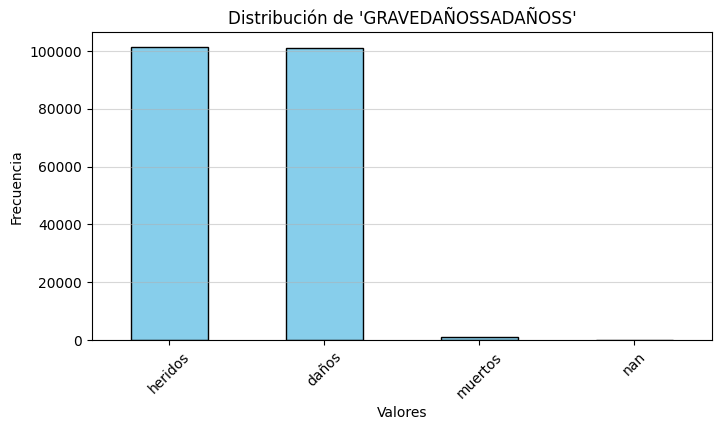

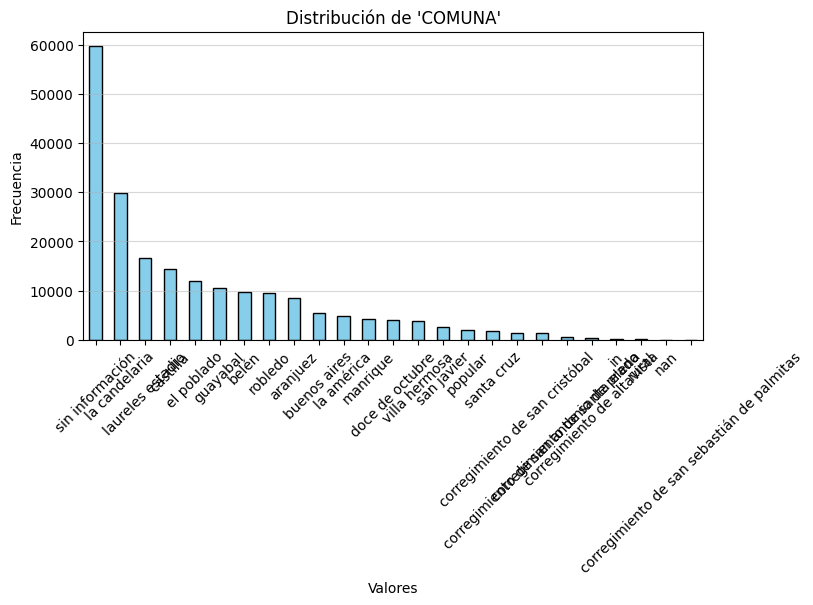

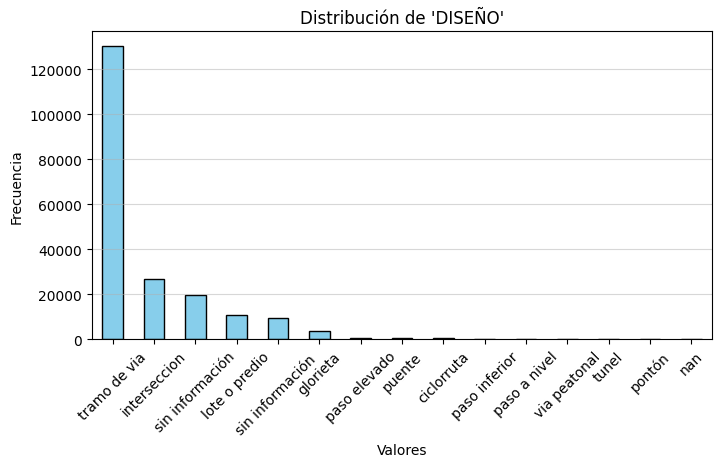

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

def graficar_histogramas(data):
    """
    Genera histogramas para todas las columnas del DataFrame excepto:
    - COD_MUNICIPIO
    - FECHA
    - DIRECCIÓN
    """
    columnas_excluir = {'COD_MUNICIPIO', 'FECHA', 'HORA', 'DIRECCIÓN', 'BARRIO'}
    columnas_a_graficar = [col for col in data.columns if col not in columnas_excluir]
    
    for columna in columnas_a_graficar:
        plt.figure(figsize=(8, 4))
        
        if data[columna].dtype == 'object' or data[columna].dtype.name == 'category':
            data[columna] = data[columna].astype(str).str.lower().fillna("desconocido")  # Manejo de NaN
            data[columna].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
            plt.ylabel("Frecuencia")
        else:
            plt.hist(data[columna].dropna(), bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
            plt.ylabel("Frecuencia")
        
        plt.title(f"Distribución de '{columna}'")
        plt.xlabel("Valores")
        plt.xticks(rotation=45)
        plt.grid(axis='y', alpha=0.5)
        plt.show()

# Ejemplo de uso con un DataFrame llamado 'data'
# data = pd.read_csv("tu_archivo.csv")
graficar_histogramas(data)



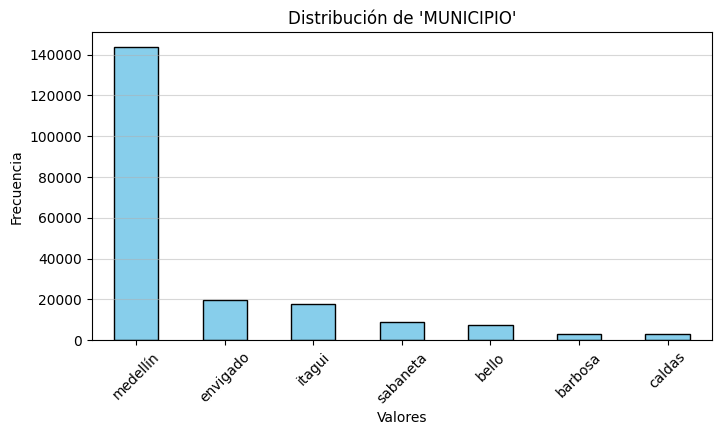

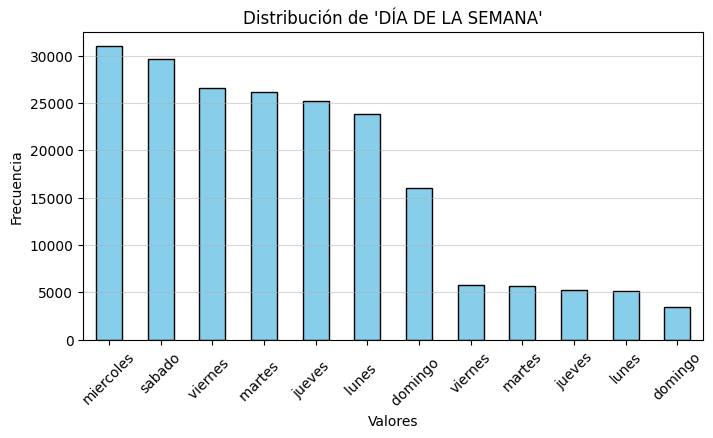

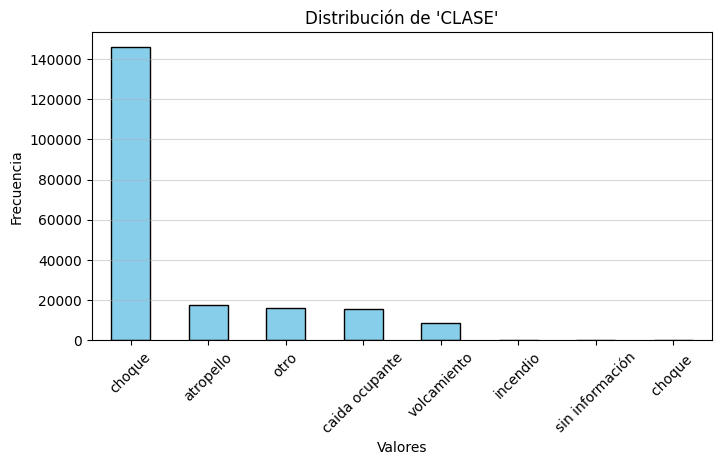

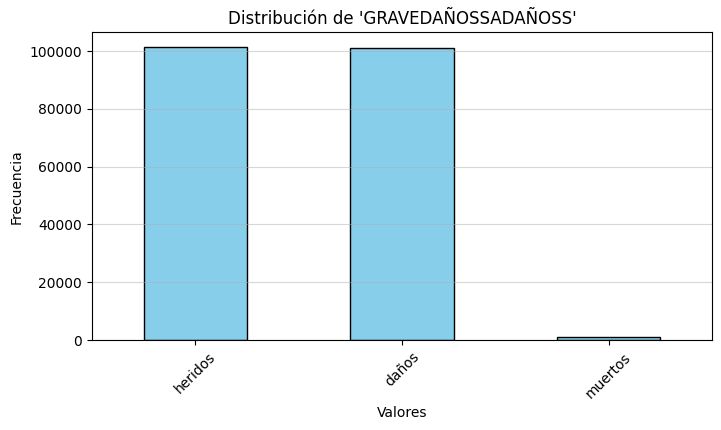

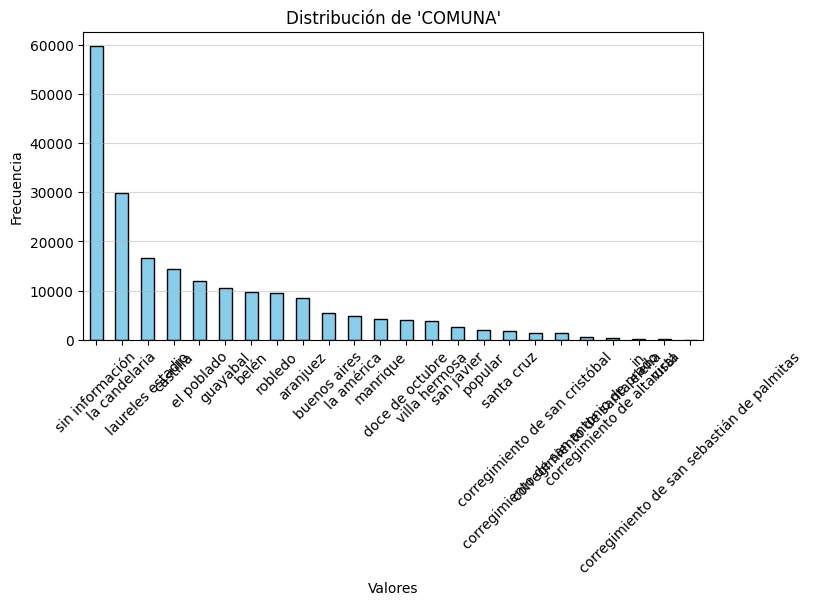

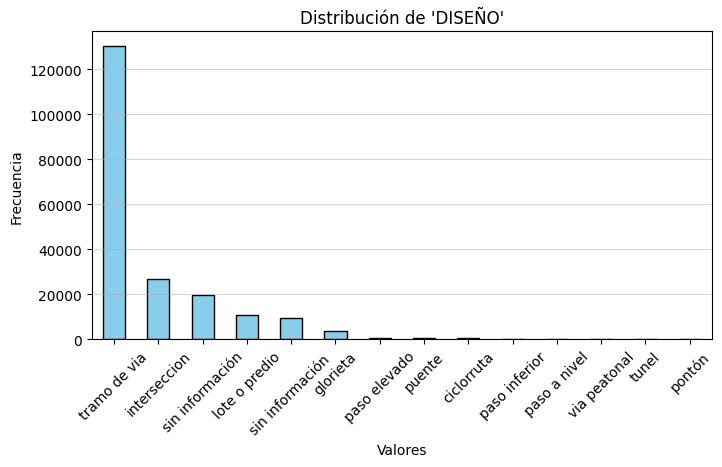

In [15]:
data = data.dropna(subset=['BARRIO', 'DIRECCIÓN', 'HORA', 'DIRECCIÓN', 'BARRIO'])
graficar_histogramas(data)